<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/6%3ANeural%20Networks%3A%20Training/6.7%3ANeural_Network_Training_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: **Training in Agricultural Company**

### In this chapter, you’ll explore the foundational aspects of training neural networks in AI-oriented Agricultural company. You’ll work as an AI engineer to train models that solve critical challenges in different domains. Along the way, you’ll learn about gradient descent, batch processing, and training neural networks from scratch.

References:
* Column Stack (Numpy) [link](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html)

* PyTorch Tensors (PyTorch) [link](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)

* Sequential (PyTorch) [link](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

Imports and CUDA

In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Check if CUDA (GPU) is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


### **Task1: Predicting Equipment Costs**

The AI Agriculture Company is developing a tool to predict the cost of manufacturing its new agricultural equipment. The cost is directly proportional to the square of the material used. Your task is to compute and predict the cost, and debug the gradients of the implemented backpropagation process.

Use when required: $$ f(x) = x^2$$

**Step1:** Define the Problem

Assume the material required is represented as a single feature: **material_amount**. For simplicity:

* **Input:** material_amount (a tensor of size (1, 1)) — e.g., 5 units of material.
* **Target cost:** material_amount ** 2 — the cost of producing the equipment.

In [3]:
# Material amount as input (e.g., 5 units)
material_amount = torch.tensor([[5.0]], requires_grad=False)

# Target cost (cost = material_amount ** 2)
target_cost = material_amount ** 2

material_amount, target_cost

(tensor([[5.]]), tensor([[25.]]))

**Step2:** Set Up the Model

Use a single-layer linear model to predict the cost. The model should:

* Take material_amount as input.
* Output the predicted cost (scalar).

In [4]:
# Start with random weights and zero biases
torch.manual_seed(0)
weight = torch.tensor([[0.5]], requires_grad=True)
bias = torch.tensor([[0.0]], requires_grad=True)

# Linear model: predicted_cost = weight * material_amount + bias
predicted_cost = torch.matmul(material_amount, weight) + bias

weight, bias, predicted_cost, material_amount

(tensor([[0.5000]], requires_grad=True),
 tensor([[0.]], requires_grad=True),
 tensor([[2.5000]], grad_fn=<AddBackward0>),
 tensor([[5.]]))

**Step3:** Compute Loss

Use Mean Squared Error **(MSE)** to calculate the loss between the predicted and actual costs.

In [5]:
# Loss function: Mean Squared Error (MSE)
# loss_fn = nn.MSELoss()
# loss = loss_fn(predicted_cost, target_cost)
loss = torch.mean((predicted_cost - target_cost) ** 2)
loss

tensor(506.2500, grad_fn=<MeanBackward0>)

**Step4:** Backpropagation

* Write the gradient descent process step-by-step.
* Manually compute the gradients of the loss with respect to the model's weights and biases using the chain rule.


In [6]:
# Calculate the gradient of the loss w.r.t. predicted_cost
grad_predicted_cost = 2 * (predicted_cost - target_cost) / target_cost.size(0)

# Calculate the gradient of predicted_cost w.r.t. weight and bias
weight_grad = torch.matmul(material_amount.t(), grad_predicted_cost)
bias_grad = torch.sum(grad_predicted_cost)

weight_grad, bias_grad

(tensor([[-225.]], grad_fn=<MmBackward0>),
 tensor(-45., grad_fn=<SumBackward0>))

**Step5:** Verify Gradients

Use **torch.autograd** to compute gradients automatically and compare them with your manual calculations.

You can use **allclose** to check whether all elements of two tensors are approximately equal, within a specified tolerance.

https://pytorch.org/docs/stable/generated/torch.allclose.html

In [7]:
# Code Here
loss.backward()
print(f"Weight Gradient: {weight.grad}")
print(f"Bias Gradient: {bias.grad}")


Weight Gradient: tensor([[-225.]])
Bias Gradient: tensor([[-45.]])


In [8]:
# Compare Gradients
print("Manual Gradients:")
print("Weight Gradient:", weight_grad.item())
print("Bias Gradient:", bias_grad.item())

print("\nAutograd Gradients:")
print("Weight Gradient:", weight.grad.item())
print("Bias Gradient:", bias.grad.item())

# Verify the Gradients
print("\nGradient Verification:")
print("Weight Gradients Match:", torch.allclose(weight_grad, weight.grad, atol=1e-6))
print("Bias Gradients Match:", torch.allclose(bias_grad, bias.grad, atol=1e-6))

Manual Gradients:
Weight Gradient: -225.0
Bias Gradient: -45.0

Autograd Gradients:
Weight Gradient: -225.0
Bias Gradient: -45.0

Gradient Verification:
Weight Gradients Match: True
Bias Gradients Match: True




---



### **Task2: Optimizing Equipment Production with Neural Networks**

The AI Agriculture Company wants to predict the efficiency of manufacturing equipment based on two input features:

* Weekly hours spent on machine maintenance
* Weekly hours spent on training factory workers.

The company believes these two factors significantly impact production efficiency, which is represented as a score between 0 and 1. Your task is to build and train a simple neural network to predict this efficiency score.

**Step 1:** Dataset Details

Simulate a dataset with the following properties:

* Feature 1: Machine Maintenance Hours (range: 5 to 50 hours).
* Feature 2: Training Hours for Workers (range: 2 to 20 hours).
* Target Output: Efficiency score calculated as:

$$ Efficiency Score= (0.4⋅Maintenance Hours+0.6⋅Training Hours)/5$$
​



In [9]:
# Complete the code here
np.random.seed(42)
machine_maintenance_hours = np.random.uniform(5, 50, 500)  # Maintenance hours
training_hours = np.random.uniform(2, 20, 500)             # Training hours
efficiency_score = (0.4 * machine_maintenance_hours + 0.6* training_hours) / 50 # Efficiency score

# Combine into a dataset
X = np.column_stack((machine_maintenance_hours, training_hours))
y = efficiency_score.reshape(-1, 1)



**Step 2**: Split the dataset into training (80%) and validation (20%) sets.

In [10]:
# Code Here
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Step3:** Normalize input features to improve training stability.

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# X_val = scaler.transform(X_val)

In [12]:
# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

**Step4:** Define a neural network with the following structure:

* Input Layer: 2 neurons (for the two input features).
* Hidden Layer: 5 neurons with ReLU activation.
* Output Layer: 1 neuron with sigmoid activation (to output a value between 0 and 1).


In [13]:
model = nn.Sequential(
    nn.Linear(2, 5),  # 2 input features, 5 hidden neurons
    nn.ReLU(),        # ReLU activation
    nn.Linear(5, 1),  # 1 output neuron
    nn.Sigmoid()      # Sigmoid activation for efficiency score
)

**Step5**: Train the network using:

* **Optimizers**: SGD.
* **Epochs**: 200.
* **Learning Rates**: 0.01.

In [14]:
def train_model(model, loss_fn, optimizer, X, y, X_val, y_val, epochs):
  train_losses, val_losses = [], []
  for epoch in range(epochs):
    model.train()
    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = loss_fn(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
      val_pred = model(X_val)
      val_loss = loss_fn(val_pred, y_val)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 50 == 0 or epoch == 0:
      print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

  return train_losses, val_losses

# Step 6: Train and evaluate the model
epochs = 500
learning_rate = 0.05

optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

print("\nTraining the model...")
train_losses, val_losses = train_model(model, loss_fn, optimizer, X_train, y_train, X_val, y_val, epochs)



Training the model...
Epoch [1/500], Loss: 0.0652, Val Loss: 0.0536
Epoch [50/500], Loss: 0.0301, Val Loss: 0.0326
Epoch [100/500], Loss: 0.0263, Val Loss: 0.0285
Epoch [150/500], Loss: 0.0238, Val Loss: 0.0258
Epoch [200/500], Loss: 0.0218, Val Loss: 0.0237
Epoch [250/500], Loss: 0.0201, Val Loss: 0.0220
Epoch [300/500], Loss: 0.0186, Val Loss: 0.0204
Epoch [350/500], Loss: 0.0173, Val Loss: 0.0191
Epoch [400/500], Loss: 0.0161, Val Loss: 0.0178
Epoch [450/500], Loss: 0.0151, Val Loss: 0.0167
Epoch [500/500], Loss: 0.0141, Val Loss: 0.0157


**Step6:**  Plot and analyze the convergence curves for training and validation loss

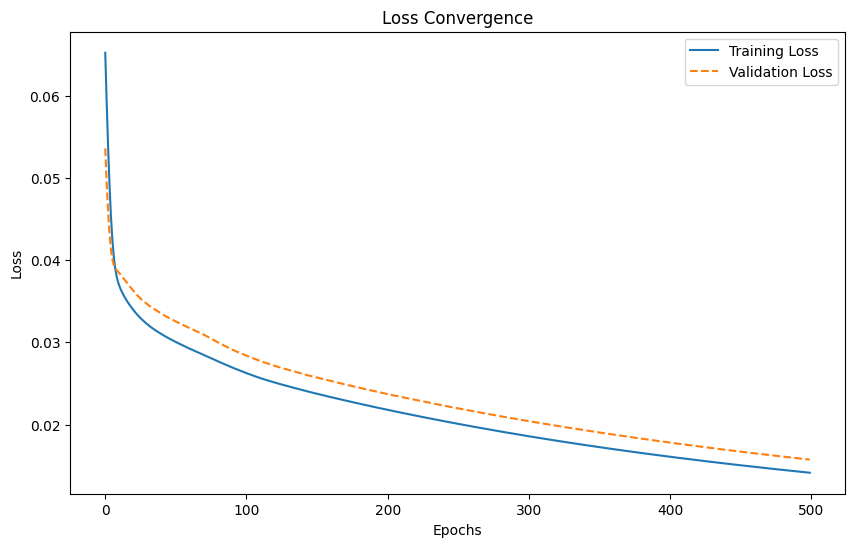

In [15]:
# Code Here
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss", linestyle="--")
plt.title("Loss Convergence")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Bonus:** Modify epochs to 500 and learning rate to 0.05 and analyse the graph



---



### **Task3: Predicting Crop Yield in AgroTech**

In AgroTech, an agriculture-focused town, farmers rely on AI systems to predict crop yields based on weather and soil data.

Your task is to build and train a neural network to predict Crop Yield (tons/ha) using features from the provided dataset **(agriculture_dataset_codebasics_DL.csv)**.

**Dataset Overview**

The agriculture_dataset.csv file contains the following features:

* Temperature (C): Average temperature during the growing season.

* Rainfall (mm): Total rainfall during the growing season.

* Soil_pH: Soil acidity (range: 0-14).

* Nitrogen (mg/kg): Nitrogen content in the soil.

* Irrigation_Hours: Total hours of irrigation during the growing season.

* Fertilizer_Usage (kg/ha): Total fertilizer used per hectare.

* Crop_Yield (tons/ha): Target variable representing the crop yield.

**Goal**

Train a neural network to predict the crop yield using Batch Gradient Descent, Mini-Batch Gradient Descent, and Stochastic Gradient Descent.

Compare their performance by plotting loss convergence over epochs.

**Step 1:** Load and split the dataset

In [31]:
# Load the dataset
df = pd.read_csv('agriculture_dataset_codebasics_DL.csv')
df.head()

# Split data into features and target
X = df[['Temperature (C)', 'Rainfall (mm)', 'Soil pH', 'Nitrogen (mg/kg)', 'Irrigation Hours', 'Fertilizer Usage (kg/ha)']].values
y = df['Crop Yield (tons/ha)'].values.reshape(-1, 1)

**Step 2:** Normalize the input features to a range of 0-1 and perform an **80%-20%** train-validation split.

In [32]:
# Code
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Convert data to PyTorch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

**Step 3:** Define a neural network architecture

**Input:** 6 features (Temperature, Rainfall, Soil pH, Nitrogen, Irrigation Hours, Fertilizer Usage).

**Hidden Layer:** 10 neurons with ReLU activation.

**Output:** 1 neuron with linear activation (for regression).

In [35]:
# Code Here
model = nn.Sequential(
    nn.Linear(6, 10),  # 6 input features, 10 hidden neurons
    nn.ReLU(),        # ReLU activation
    nn.Linear(10, 1)  # 1 output neuron
)

# Define the loss function
loss_fn = torch.nn.MSELoss()

**Step 4:** Train the network using

Batch Gradient Descent (GD):Update weights after processing the entire dataset.

Mini-Batch Gradient Descent: Update weights after processing batches of size 16.

Stochastic Gradient Descent (SGD): Update weights after every data point.

In [49]:
# Training function for different GD methods
def train_model(optimizer, X, y, epochs=50, batch_size=None):
  losses = []
  for epoch in range(epochs):
    epoch_loss = 0.0
    if batch_size is None:
      # Batch Gradient Descent (GD)
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      epoch_loss = loss.item()
    else:
      # Mini-Batch Gradient Descent or SGD
      for batch_start in range(0, len(X), batch_size):
        batch_end = batch_start + batch_size
        batch_X = X[batch_start:batch_end]
        batch_y = y[batch_start:batch_end]
        y_pred = model(batch_X)
        loss = loss_fn(y_pred, batch_y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_loss += loss.item()

    losses.append(epoch_loss / X.size(0))
    # # Validation
    # model.eval()
    # with torch.no_grad():
    #   val_pred = model(X_val)
    #   val_loss = loss_fn(val_pred, y_val)

    if (epoch + 1) % 50 ==0 or epoch == 0:
      print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

  return losses


print("\nTraining the model GD...")
# Train the model using Batch GD
optimizer = optim.SGD(model.parameters(), lr=0.01)
losses_batch = train_model(optimizer, X_train, y_train, epochs=50, batch_size=None)

print("\nTraining the model MGD...")
# Reset model
model = torch.nn.Sequential(
    torch.nn.Linear(6, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
# Train the model using Mini-Batch GD
optimizer = optim.SGD(model.parameters(), lr=0.01)
losses_mini_batch = train_model(optimizer, X_train, y_train, epochs=50, batch_size=16)

print("\nTraining the model MGD...")
# Reset model
model = torch.nn.Sequential(
    torch.nn.Linear(6, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
# Train the model using Stochastic GD
optimizer = optim.SGD(model.parameters(), lr=0.01)
losses_sgd = train_model(optimizer, X_train, y_train, epochs=50, batch_size=1)



Training the model GD...
Epoch [1/50], Loss: 0.0008
Epoch [50/50], Loss: 0.0008

Training the model MGD...
Epoch [1/50], Loss: 11.1936
Epoch [50/50], Loss: 0.0391

Training the model MGD...
Epoch [1/50], Loss: 11.3561
Epoch [50/50], Loss: 0.0111


**Step 5:** Plot the loss over epochs for each method.

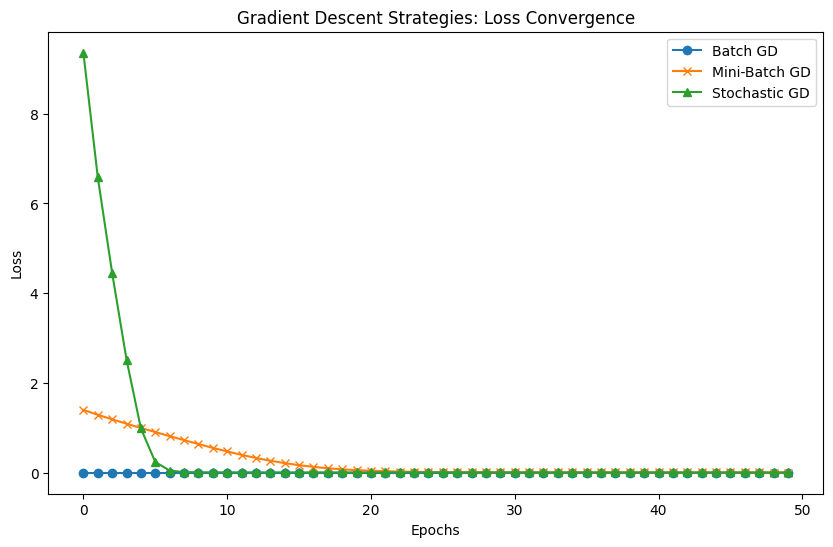

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(losses_batch, label='Batch GD', marker='o')
plt.plot(losses_mini_batch, label='Mini-Batch GD', marker='x')
plt.plot(losses_sgd, label='Stochastic GD', marker='^')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Gradient Descent Strategies: Loss Convergence')
plt.legend()
plt.show()

**Step 6:** Evaluate the model's Mean Squared Error (MSE) on the validation set.

In [51]:
with torch.no_grad():
  y_val_pred = model(X_val)
  mse = loss_fn(y_val_pred, y_val)
  print(f"Validation Loss: {mse}")


Validation Loss: 0.011305204592645168
